In [1]:
# import itertools
import os
import sys
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.io

from collections import defaultdict
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import re
import h5py
import napari
import tifffile as tiff
import seaborn as sns
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
p_dir = (Path().cwd().parents[0]).absolute()

module_path = str(p_dir / "src")
 
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
data_dir = (Path().cwd().parents[0] / 'data').absolute()

df_meta_path = data_dir / 'basline' / 'metadata' / 'imgs_reg.csv'
df_imgs = pd.read_csv(df_meta_path)


# PLA quantification

In [32]:
import PLA

PPI_save_path =  data_dir / 'basline' / 'PPI'
PPI_save_path.mkdir(parents=True, exist_ok=True)


PPI_imgs_path =  data_dir / 'baseline'  / 'PPI_imgs'
PPI_imgs_path.mkdir(parents=True, exist_ok=True)

In [33]:
for row in df_imgs.itertuples():
    path = row.Path
    with h5py.File(path, 'r') as f:
        markers = f['imgs'].attrs['Marker']
    print(markers)


['DNA' 'Cyclin D1' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'CDK4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'SOX2' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'Oct4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'CycD1/CDK4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'Sox2/Oct4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'Wnt1/Tead' 'DNA' 'Wnt1' 'Tead']
['DNA' 'Cyclin D1' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'CDK4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'SOX2' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'Oct4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'CycD1/CDK4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'Sox2/Oct4' 'DNA' 'Concanavalin A' 'Phalloidin' 'WGA']
['DNA' 'Wnt1/Tead' 'DNA' 'Wnt1' 'Tead']


In [34]:
df_imgs['FOV'] = df_imgs['FOV'].astype(str)

In [35]:
RNAs = ['CycD1/CDK4', 'Sox2/Oct4', 'Wnt1/Tead']

for row in df_imgs.itertuples():
    # Read image
    path = row.Path
    pla_detect = PLA.PLA_detection(path)
    
    with h5py.File(path, 'r') as f:
        markers = f['imgs'].attrs['Marker']
        
    imgs_spots = []
    imgs_wths = []
    imgs_raw = []
    for RNA in RNAs: 
        if RNA in markers:
            img_spot, img_wth, _, img = pla_detect.detect_spot(RNA, thres=0.06)
            imgs_spots.append(img_spot)
            imgs_wths.append(img_wth)
            imgs_raw.append(img)

    # Save imgs
    file_path = PPI_imgs_path / ('_'.join(row[1:3]) + '_raw.tiff')
    tiff.imwrite(file_path, imgs_raw)
    file_path = PPI_imgs_path / ('_'.join(row[1:3]) + '_processed.tiff')
    tiff.imwrite(file_path, imgs_wths)
    file_path = PPI_imgs_path / ('_'.join(row[1:3]) + '_detected.tiff')
    tiff.imwrite(file_path, imgs_spots)

    # Save PPI dict
    name = '_'.join(row[1:3])+'.pkl'
    pla_detect.save_pickle(PPI_save_path / name)


c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_2_raw.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_2_processed.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_2_detected.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_3_raw.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter

File exist. Deleted
File exist. Deleted


c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_4_raw.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_4_processed.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_4_detected.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Control_5_raw.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter

File exist. Deleted
File exist. Deleted
Reading image CycD1/CDK4
Processing image CycD1/CDK4
(array([0, 1], dtype=uint8), array([15955807,   224973], dtype=int64))
File exist. Deleted
Reading image Sox2/Oct4
Processing image Sox2/Oct4
(array([0, 1], dtype=uint8), array([15982693,   196963], dtype=int64))
File exist. Deleted
Reading image Wnt1/Tead
Processing image Wnt1/Tead
(array([0, 1], dtype=uint8), array([16029675,    81585], dtype=int64))
File exist. Deleted
File exist. Deleted
File exist. Deleted


c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Treated_2_raw.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Treated_2_processed.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Treated_2_detected.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter 'Treated_3_raw.tiff'> writing zero-size array to nonconformant TIFF
  warnings.warn(
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\tifffile\tifffile.py:2181: UserWarning: <tifffile.TiffWriter

File exist. Deleted
File exist. Deleted
Reading image CycD1/CDK4
Processing image CycD1/CDK4
(array([0, 1], dtype=uint8), array([15864816,   321834], dtype=int64))
File exist. Deleted
Reading image Sox2/Oct4
Processing image Sox2/Oct4
(array([0, 1], dtype=uint8), array([16165897,    31149], dtype=int64))
File exist. Deleted
Reading image Wnt1/Tead
Processing image Wnt1/Tead
(array([0, 1], dtype=uint8), array([16078528,   120815], dtype=int64))
File exist. Deleted


In [15]:
import napari

viewer = napari.view_image(np.stack(imgs_wths), blending='additive')
viewer.add_image(np.stack(img), blending='additive')
viewer.add_image(np.stack(imgs_spots), blending='additive', contrast_limits=[0,1])

<Image layer 'Image [2]' at 0x211225f7820>

# QC segmentation

In [21]:
from skimage import morphology, measure
from skimage.segmentation import clear_border
from collections import defaultdict
   
def count_pixel_label_mask(regionmask, intensity_image):
    v,c = np.unique(intensity_image[regionmask], return_counts=True)
    return dict(zip(v,c))
    
# Quality control of mask
def qc_nuclei(mask_cyto, mask_nuclei, small_size=2000):
    '''
    Function to check if cell masks contain nuclei
    '''
    # Dictionnary storing nuclei and cyto label to cell id 
    nuclei2cell = {}
    cyto2cell = {}
    
    # Filter out small objects
    mask_cyto = morphology.remove_small_objects(mask_cyto,  min_size=small_size)
    
    # Filter out mask touching border
    mask_cyto = clear_border(mask_cyto)
    
    # Filtered only cell mask region
    cell_mask = np.where(mask_cyto > 0, 1, 0)
    mask_nuclei_filtered = mask_nuclei * cell_mask
    mask_nuclei_filtered =  morphology.remove_small_objects(mask_nuclei_filtered,  min_size=small_size)
    
    nuclei_mask = np.where(mask_nuclei>0, 1, 0)
    cyto = (mask_cyto - mask_cyto*nuclei_mask).astype(np.uint16)
    
    # Count pixel cell label in each nuclei region to assign each nuclei to cell
    props = measure.regionprops(mask_nuclei_filtered, intensity_image=mask_cyto, 
                    extra_properties=(count_pixel_label_mask,))
    nuclei_labels = []
    cell_labels = []
    for prop in props:
        df = pd.DataFrame.from_dict(prop['count_pixel_label_mask'], orient='index').reset_index()
        df.columns = ['Label', 'Count']
        corresponding_label = df.iloc[df['Count'].argmax(axis=0)]['Label']
        nuclei_labels.append(prop['Label'])
        cell_labels.append(corresponding_label)
    
    df = pd.DataFrame({'Nuclei': nuclei_labels, 'Cyto': cell_labels})
    return mask_cyto, mask_nuclei_filtered, cyto, df

In [22]:
# Read masks paths 
mask_dir = data_dir /  'basline' / 'imgs' / 'masks'
mask_filt_dir = data_dir /  'basline'/ 'imgs' / 'masks_filtered'
mask_filt_dir.mkdir(parents=True, exist_ok=True)

masks_path = defaultdict(dict) 
for path in os.listdir(mask_dir):A
    name = path.split('.')[0]
    if 'Nuclei' in name:
        masks_path[name[7:]]['nuclei'] = mask_dir / path
    else:
        masks_path[name]['cyto'] = mask_dir / path


In [25]:
masks_path

defaultdict(dict,
            {'Control_2': {'cyto': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Control_2.tif'),
              'nuclei': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Nuclei_Control_2.tif')},
             'Control_3': {'cyto': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Control_3.tif'),
              'nuclei': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Nuclei_Control_3.tif')},
             'Control_4': {'cyto': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Control_4.tif'),
              'nuclei': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Nuclei_Control_4.tif')},
             'Control_5': {'cyto': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Control_5.tif'),
              'nuclei': WindowsPath('Y:/coskun-lab/Thomas/23_PLA_revision/data/basline/imgs/masks/Nuclei_Cont

In [23]:
for row in df_imgs.itertuples():
    # Read image
    path = row.Path
    name = '_'.join(row[1:3])
    
    # Read masks
    mask_cyto_path = masks_path[name]['cyto']
    mask_nuclei_path = masks_path[name]['nuclei']
    
    mask_cyto = skimage.io.imread(mask_cyto_path)
    mask_nuclei = skimage.io.imread(mask_nuclei_path)
    
    cell, nuclei, cyto, df = qc_nuclei(mask_cyto, mask_nuclei)
    
    file_path =  mask_filt_dir / f'Nuclei_{name}.tif'
    tiff.imwrite(file_path, nuclei)
    file_path =  mask_filt_dir / f'Cell_{name}.tif'
    tiff.imwrite(file_path, cell)
    file_path =  mask_filt_dir / f'Cyto_{name}.tif'
    tiff.imwrite(file_path, cyto)
    file_path =  mask_filt_dir / f'df_{name}.csv'
    df.to_csv(file_path, index=False)

In [27]:
import napari

viewer = napari.view_labels(mask_cyto)
viewer.add_labels(mask_nuclei)

<Labels layer 'mask_nuclei' at 0x2a135054640>

In [28]:
import napari

viewer = napari.view_labels(cell)
viewer.add_labels(nuclei)

<Labels layer 'nuclei' at 0x2a13af18370>

# Quantifying IF channels

In [47]:
import skimage 
import pickle 

def read_intensity_per_cell(img, marker, mask):
    props = skimage.measure.regionprops_table(
        mask, img, properties=["label", "mean_intensity"]
    )
    df_prop = pd.DataFrame(props)
    df_prop["mean_intensity"] = df_prop["mean_intensity"]
    df_prop.columns = ["Cell_label", marker]
    return df_prop


def read_PPI(path):
    with open(path, 'rb') as file:
        PPI_dict = pickle.load(file)

    return PPI_dict

def create_PPI_df(PPI_labels, PPI_loc, name, cyto=True):
    if cyto:
        columns_name = ['Cyto', 'x', 'y']
    else:
        columns_name = ['Nuclei', 'x', 'y']
    df = pd.DataFrame(np.hstack([PPI_labels[:,np.newaxis], PPI_loc]), 
                      columns=columns_name)
    df['PPI'] = name
    return df

In [48]:
mask_filt_dir = data_dir /  'basline'  / 'imgs' / 'masks_filtered'
PPI_save_path =  data_dir / 'basline' / 'PPI'
IFs_save_path =  data_dir / 'basline' / 'IFs'

masks_path = defaultdict(dict) 
for path in os.listdir(mask_filt_dir):
    name = path.split('.')[0]
    if 'Nuclei' in name:
        masks_path[name[7:]]['nuclei'] = mask_filt_dir / path
    elif 'Cyto' in name:
        masks_path[name[5:]]['cyto'] =mask_filt_dir / path
    elif 'Cell' in name:
        masks_path[name[5:]]['cell'] =mask_filt_dir / path    
    elif 'df' in name:
        masks_path[name[3:]]['df'] =mask_filt_dir / path
    else:
        pass

In [49]:
RNAs = ['CycD1/CDK4', 'Sox2/Oct4', 'Wnt1/Tead']
IFs = ['Cyclin D1', 'CDK4', 'SOX2', 'Oct4']

for row in df_imgs.itertuples():
    path = row.Path
    name = '_'.join(row[1:3])
    
    # Read masks
    mask_cyto_path = masks_path[name]['cell']
    mask_nuclei_path = masks_path[name]['nuclei']
    df_path =  masks_path[name]['df']
    
    mask_cyto = skimage.io.imread(mask_cyto_path)
    mask_nuclei = skimage.io.imread(mask_nuclei_path)
    df_cell_info = pd.read_csv(df_path)
    nuclei2cell = dict(zip(df_cell_info.iloc[:,0], df_cell_info.iloc[:,1]))   
    
    # Read IF imgs
    with h5py.File(path, 'r') as f:
        imgs = f['imgs'][:]
        markers = f['imgs'].attrs['Marker']
    
    for i,m in enumerate(markers):
        if m in IFs:
#             df_prop = read_intensity_per_cell(imgs[i], m, mask_cyto)
            
#             # Save dataframe
#             path = IFs_save_path / f'{name}.csv'
#             df_prop.to_csv(path, index=False)
            pass
    try:
        # Read PPi
        PPI_dict = read_PPI(PPI_save_path / f'{name}.pkl')
        dfs_PPI_cyto = []
        dfs_PPI_nuclei = []
        for k in PPI_dict.keys():
            PPI_loc = PPI_dict[k][:, 1:3].astype(np.uint32)

            # Cyto
            PPI_labels = mask_cyto[PPI_loc[:,0], PPI_loc[:,1]]
            df_PPI = create_PPI_df(PPI_labels, PPI_loc, k)
            dfs_PPI_cyto.append(df_PPI)

            # Nuclei
            PPI_labels = mask_nuclei[PPI_loc[:,0], PPI_loc[:,1]]
            df_PPI = create_PPI_df(PPI_labels, PPI_loc, k, cyto=False)
            dfs_PPI_nuclei.append(df_PPI)

        # Combined DFs
        df_PPI_cyto = pd.concat(dfs_PPI_cyto)
        df_PPI_nuclei = pd.concat(dfs_PPI_nuclei)
        df_PPI_nuclei['Nuclei'] = df_PPI_nuclei['Nuclei'].apply(lambda x: nuclei2cell.get(x,x))   
        df_merged = df_PPI_cyto.merge(df_PPI_nuclei)
        df_merged['Condition'] = row[1]
        df_merged['FOV'] = row[2]

        # Save dataframe
        path = PPI_save_path / f'{name}.csv'
        df_merged.to_csv(path, index=False)
    except:pass 
    

# IF quantification

In [23]:
PPI_save_path =  data_dir / 'basline' / 'IFs'

dfs = []
for path in os.listdir(PPI_save_path):
    if 'csv' in path:
        df = pd.read_csv(PPI_save_path / path)
        df['Marker'] = df.columns[-1]
        df.columns = ['Id', 'Expression', 'Marker']
        df['Condition'] = path.split('_')[0]
        dfs.append(df)

df = pd.concat(dfs)

In [24]:
df.head()

,Id,Expression,Marker,Condition
0,3,0.000000,Cyclin D1,Control
1,6,0.019608,Cyclin D1,Control
2,7,0.000000,Cyclin D1,Control
3,17,0.023365,Cyclin D1,Control
4,21,0.014732,Cyclin D1,Control


## Plot

In [25]:
from statannotations.Annotator import Annotator

def plot(plotting, figsize=(7,7), y_title='Expression'):
    c1, c2 = plotting['data'][plotting['hue']].unique()
    pairs = [((e, c1), (e, c2)) for e in plotting['data'][plotting['x']].unique()]

    with sns.plotting_context('talk', font_scale=1.5):
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.boxplot(**plotting, showfliers=False, ax=ax)
        # ax = sns.swarmplot(**plotting, ax=ax, dodge=True, edgecolor='k', size=3.5, linewidth=0.5, alpha=0.5)
        annot = Annotator(ax, pairs, **plotting)
        annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
        result = annot.apply_test().annotate()
        ax.set_ylabel(y_title, fontsize=40)
        plt.xticks(rotation=30, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

CDK4_Control vs. CDK4_Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:1.124e-06 U_stat=8.130e+03
Cyclin D1_Control vs. Cyclin D1_Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:4.077e-41 U_stat=4.812e+04
SOX2_Control vs. SOX2_Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:1.469e-01 U_stat=6.608e+03
Oct4_Control vs. Oct4_Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:7.485e-02 U_stat=1.803e+04


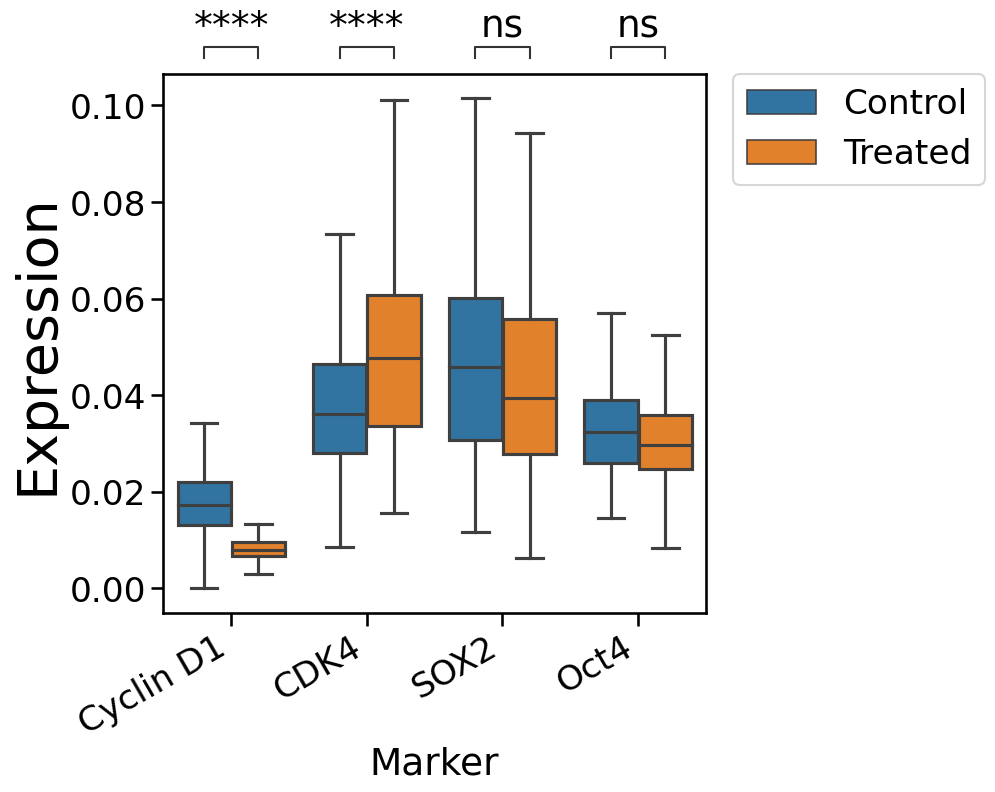

In [26]:
# Boxplot per cell
plotting = {
    "data": df,
    "x": "Marker",
    "y": "Expression",
    "hue": "Condition"
}

plot(plotting)

In [28]:
df.groupby(['Condition', 'Marker'])['Expression'].describe().to_clipboard()

In [27]:
# df.groupby(['Condition', 'Marker'])['Expression'].describe().to_excel('data.xlsx')

# PPI quantification

In [5]:
PPI_save_path =  data_dir / 'basline' / 'PPI'

dfs = []
for path in os.listdir(PPI_save_path):
    if 'csv' in path:
        df = pd.read_csv(PPI_save_path / path)
        dfs.append(df)

df = pd.concat(dfs)

In [6]:
df.head()

,Cyto,x,y,PPI,Nuclei,Condition,FOV
0,0,2068,1445,CycD1/CDK4,0.0,Control,6
1,0,724,3260,CycD1/CDK4,0.0,Control,6
2,52,1024,1314,CycD1/CDK4,0.0,Control,6
3,52,1024,1314,CycD1/CDK4,0.0,Control,6
4,52,1024,1314,CycD1/CDK4,0.0,Control,6


In [7]:
g = df.groupby(['Condition', 'FOV', 'PPI', 'Cyto']).size()
df_cell = pd.DataFrame({'Count Cyto': g}).reset_index()
df_cell = df_cell[df_cell.Cyto != 0]
df_cell.columns = ['Condition', 'FOV', 'PPI', 'Id', 'Count_cell']
# df_cell = (df_cell.pivot_table(values='Count_cell', columns='PPI', index=['Condition', 'FOV','Id'])
# .fillna(0)
# .reset_index()
# .melt(id_vars=['Condition', 'FOV','Id'], value_name='Count_cell', var_name='PPI')
# )

g = df.groupby(['Condition', 'FOV', 'PPI', 'Nuclei']).size()
df_nuclei = pd.DataFrame({'Count Nuclei': g}).reset_index()
df_nuclei= df_nuclei[df_nuclei.Nuclei != 0]
df_nuclei.columns = ['Condition', 'FOV', 'PPI', 'Id', 'Count_nuclei']
# df_nuclei = (df_nuclei.pivot_table(values='Count_nuclei', columns='PPI', index=['Condition', 'FOV','Id'])
# .fillna(0)
# .reset_index()
# .melt(id_vars=['Condition', 'FOV','Id'], value_name='Count_nuclei', var_name='PPI')
# )

In [8]:
df_all = df_cell.merge(df_nuclei, how='left', on=['Condition', 'FOV', 'PPI', 'Id']).fillna(0)
df_all.loc[df_all['Count_cell'] < df_all['Count_nuclei'],'Count_cell'] = df_all.loc[df_all['Count_cell'] < df_all['Count_nuclei']]['Count_nuclei']



In [9]:
df_all['Count_nuclei'] = df_all['Count_nuclei'].astype(int)
df_all['Count_cyto'] = df_all['Count_cell'] - df_all['Count_nuclei']

In [10]:
# Filter out by maximum number of counts per cell
min_count = 0
max_count = 400

df_all = df_all.groupby(['Condition', 'FOV', 'Id']).filter(lambda x: x['Count_cell'].sum() > min_count)
df_all = df_all.groupby(['Condition', 'FOV', 'Id']).filter(lambda x: (x['Count_cell'] < max_count).all())
df_all.groupby(['Condition', 'FOV', 'Id']).sum().describe()

C:\Users\thu71\AppData\Local\Temp\ipykernel_1046420\3521185068.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all.groupby(['Condition', 'FOV', 'Id']).sum().describe()


,Count_cell,Count_nuclei,Count_cyto
count,818.000000,818.000000,818.000000
mean,55.096577,23.916870,31.179707
std,47.324259,22.391049,32.511867
min,1.000000,0.000000,0.000000
25%,19.000000,8.000000,7.000000
50%,43.000000,19.000000,20.500000
75%,76.000000,35.000000,45.750000
max,354.000000,176.000000,218.000000


In [11]:
# Describe statistics
df_all.groupby(['Condition', 'PPI'])['Count_cell'].describe().to_excel('data.xlsx')

In [12]:
# df_all = df_all[df_all['Count_cyto']>=0]


## PLOT

In [13]:
from statannotations.Annotator import Annotator

In [14]:
from statannotations.Annotator import Annotator

def plot(plotting, figsize=(7,7), y_title='PPI Count'):
    c1, c2 = plotting['data'][plotting['hue']].unique()
    pairs = [((e, c1), (e, c2)) for e in plotting['data'][plotting['x']].unique()]

    with sns.plotting_context('talk', font_scale=1.35):
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.boxplot(**plotting, showfliers=False, ax=ax)
        ax = sns.swarmplot(**plotting, ax=ax, dodge=True, edgecolor='k', size=3.5, linewidth=0.5, alpha=0.5)
        annot = Annotator(ax, pairs, **plotting)
        annot.configure(test='Mann-Whitney', text_format='full', loc='outside', verbose=2, show_test_name=False)
        result = annot.apply_test().annotate()
        ax.set_ylabel(y_title, fontsize=40)
        plt.xticks(rotation=30, ha='right')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [15]:
df_all['PPI'].unique()


array(['CycD1/CDK4', 'Sox2/Oct4', 'Wnt1/Tead'], dtype=object)

c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Sox2/Oct4_Control vs. Sox2/Oct4_Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:1.108e-11 U_stat=1.919e+04
CycD1/CDK4_Control vs. CycD1/CDK4_Treated: Mann-Whitney-Wilcoxon test two-sided, P_val:6.484e-01 U_stat=2.029e+04


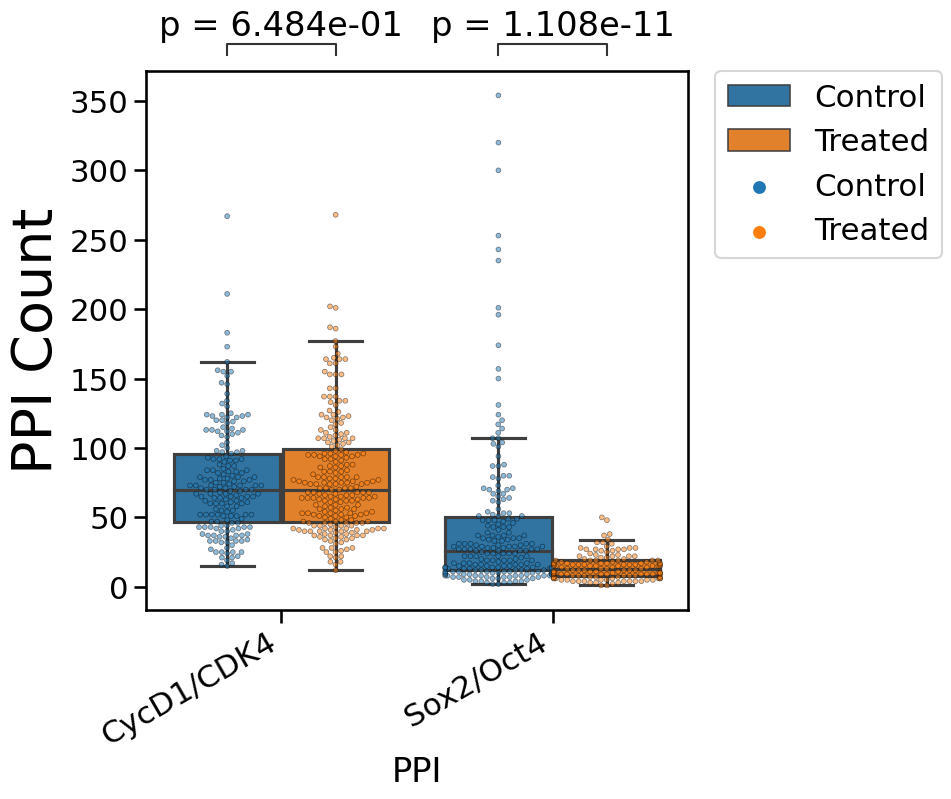

In [16]:
# Boxplot per cell
plotting = {
    "data": df_all[~(df_all.PPI == 'Wnt1/Tead')],
    "x": "PPI",
    "y": "Count_cell",
    "hue": "Condition"
}

plot(plotting)

In [17]:
df_all

,Condition,FOV,PPI,Id,Count_cell,Count_nuclei,Count_cyto
0,Control,6,CycD1/CDK4,2,15,0,15
1,Control,6,CycD1/CDK4,3,25,11,14
2,Control,6,CycD1/CDK4,4,124,49,75
3,Control,6,CycD1/CDK4,5,33,0,33
4,Control,6,CycD1/CDK4,6,37,0,37
...,...,...,...,...,...,...,...
816,Treated,8,Wnt1/Tead,34,21,17,4
817,Treated,8,Wnt1/Tead,35,39,35,4
818,Treated,8,Wnt1/Tead,36,28,23,5
819,Treated,8,Wnt1/Tead,37,26,26,0


In [22]:
df_all[~(df_all.PPI == 'Wnt1/Tead')].groupby(['Condition', 'PPI'])['Count_cell'].describe().to_clipboard()